## Fuentes et al., 2019 Notebook

### Here I am correcting my data for inclination shallowing and replotting the pole

In [3]:
import pandas as pd
import numpy as np 
import pmagpy.pmag as pmag
import pmagpy.ipmag as ipmag
import matplotlib.pyplot as plt

In [4]:
cb_sites=pd.read_csv('/Users/anthonyfuentes/Desktop/corral_bluffs/data/cb_alpha_sites.csv')

cb_sites.head()

,Site,Section,Elev (m),Lon,Lat,Dec,Inc,a95,n,R,k
0,CB1702,Bishop Wash,1908.239,-104.593245,38.847815,194.08,-68.51,44.74,3,2.77,8.66
1,CB1704,Bishop Wash,1918.995,-104.592440,38.847648,139.51,-13.83,29.85,3,2.89,18.12
2,CB1707,Bishop Wash,1935.810,-104.591436,38.855623,164.46,-37.57,14.27,3,2.97,75.67
3,CB1709,Bishop Wash,1940.649,-104.590734,38.855864,169.90,-37.11,58.55,3,2.64,5.51
4,CB1875,Bishop Wash,1945.200,-104.590733,38.855815,352.68,43.52,26.19,3,2.91,23.21


In [5]:
cb_normal=cb_sites[cb_sites['Inc ']>0]
cb_rev=cb_sites[cb_sites['Inc ']<0]

cb_rev.head()

,Site,Section,Elev (m),Lon,Lat,Dec,Inc,a95,n,R,k
0,CB1702,Bishop Wash,1908.239,-104.593245,38.847815,194.08,-68.51,44.74,3,2.77,8.66
1,CB1704,Bishop Wash,1918.995,-104.592440,38.847648,139.51,-13.83,29.85,3,2.89,18.12
2,CB1707,Bishop Wash,1935.810,-104.591436,38.855623,164.46,-37.57,14.27,3,2.97,75.67
3,CB1709,Bishop Wash,1940.649,-104.590734,38.855864,169.90,-37.11,58.55,3,2.64,5.51
22,CB1730,JZB,1946.500,-104.620965,38.860949,165.28,-51.66,16.35,3,2.97,57.88


In [6]:
cb_rev_unflat=ipmag.unsquish(incs=cb_rev['Inc '].tolist(),f=0.7)
cb_normal_unflat=ipmag.unsquish(incs=cb_normal['Inc '].tolist(),f=0.7)

cb_normal['Inc ']=cb_normal_unflat

cb_rev['Inc ']= cb_rev_unflat
cb_rev.head()


,Site,Section,Elev (m),Lon,Lat,Dec,Inc,a95,n,R,k
0,CB1702,Bishop Wash,1908.239,-104.593245,38.847815,194.08,-74.591995,44.74,3,2.77,8.66
1,CB1704,Bishop Wash,1918.995,-104.592440,38.847648,139.51,-19.375959,29.85,3,2.89,18.12
2,CB1707,Bishop Wash,1935.810,-104.591436,38.855623,164.46,-47.699256,14.27,3,2.97,75.67
3,CB1709,Bishop Wash,1940.649,-104.590734,38.855864,169.90,-47.224067,58.55,3,2.64,5.51
22,CB1730,JZB,1946.500,-104.620965,38.860949,165.28,-61.030182,16.35,3,2.97,57.88


In [7]:


dec,incs=ipmag.do_flip(dec=cb_rev['Dec '].tolist(),inc= cb_rev['Inc '].tolist())

cb_rev_flip=cb_rev

cb_rev_flip['Dec ']= dec
cb_rev_flip['Inc ']= incs



#### Take the reverse direction data, flip it, then calculate vgps. I will then concatenate that 

In [8]:
lat=38.847
lon=-104.593

cb_rev_flip=ipmag.vgp_calc(cb_rev_flip,tilt_correction='no', site_lat='Lat',
                           site_lon='Lon',
                           dec_is='Dec ', 
                           inc_is='Inc ')
cb_normal=ipmag.vgp_calc(cb_normal,tilt_correction='no', site_lat='Lat',
                           site_lon='Lon',
                           dec_is='Dec ', 
                           inc_is='Inc ')
cb_rev_flip.head()

,Site,Section,Elev (m),Lon,Lat,Dec,Inc,a95,n,R,k,paleolatitude,vgp_lat,vgp_lon,vgp_lat_rev,vgp_lon_rev
0,CB1702,Bishop Wash,1908.239,-104.593245,38.847815,14.08,74.591995,44.74,3,2.77,8.66,61.136779,66.062434,272.230720,-66.062434,92.230720
1,CB1704,Bishop Wash,1918.995,-104.592440,38.847648,319.51,19.375959,29.85,3,2.89,18.12,9.973049,43.787482,137.763607,-43.787482,317.763607
2,CB1707,Bishop Wash,1935.810,-104.591436,38.855623,344.46,47.699256,14.27,3,2.97,75.67,28.787848,73.668835,132.027001,-73.668835,312.027001
3,CB1709,Bishop Wash,1940.649,-104.590734,38.855864,349.90,47.224067,58.55,3,2.64,5.51,28.387055,76.590456,117.111384,-76.590456,297.111384
22,CB1730,JZB,1946.500,-104.620965,38.860949,345.28,61.030182,16.35,3,2.97,57.88,42.086630,78.364142,186.157704,-78.364142,6.157704


In [9]:
cb_unflat=pd.concat([cb_normal,cb_rev_flip])
cb_unflat.head()

,Site,Section,Elev (m),Lon,Lat,Dec,Inc,a95,n,R,k,paleolatitude,vgp_lat,vgp_lon,vgp_lat_rev,vgp_lon_rev
4,CB1875,Bishop Wash,1945.2,-104.590733,38.855815,352.68,53.604937,26.19,3,2.91,23.21,34.149274,82.469709,128.980394,-82.469709,308.980394
5,CB1710,Bishop Wash,1946.1,-104.590707,38.855816,343.19,65.875216,10.00,3,2.99,153.11,48.149779,74.724819,208.322999,-74.724819,28.322999
6,CB1711,Bishop Wash,1948.1,-104.590682,38.855793,1.48,69.584904,12.88,3,2.98,92.72,53.336254,75.484039,258.936928,-75.484039,78.936928
7,CB1712,Bishop Wash,1948.3,-104.589857,38.856107,351.25,66.627928,18.67,3,2.96,44.65,49.162485,77.942533,226.972241,-77.942533,46.972241
8,CB1713,Bishop Wash,1951.3,-104.589820,38.856266,343.77,76.662937,10.29,3,2.99,144.67,64.632208,62.524178,240.367704,-62.524178,60.367704


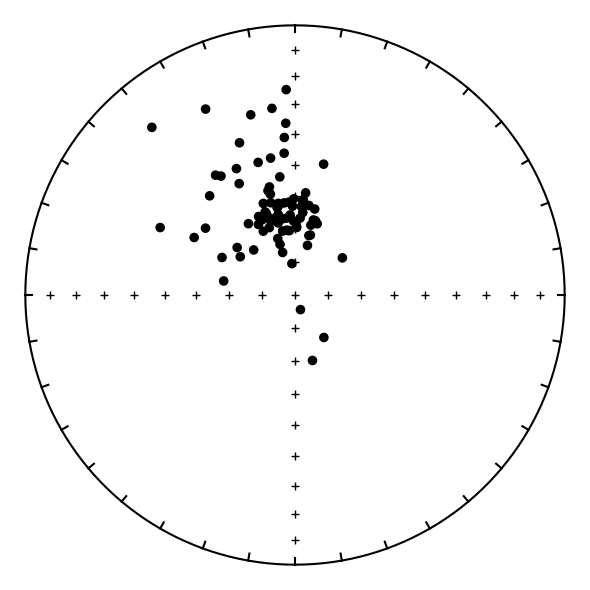

In [10]:
plt.figure(figsize=(6,6))
ipmag.plot_net()

ipmag.plot_di(dec=cb_unflat['Dec '].tolist(), inc=cb_unflat['Inc '].tolist(),markersize=35)


In [11]:
cb_pole=ipmag.fisher_mean(cb_unflat['vgp_lon'].tolist(),cb_unflat['vgp_lat'].tolist())
ipmag.print_pole_mean(cb_pole)

Plon: 208.7  Plat: 77.5
Number of directions in mean (n): 84
Angular radius of 95% confidence (A_95): 4.5
Precision parameter (k) estimate: 12.8


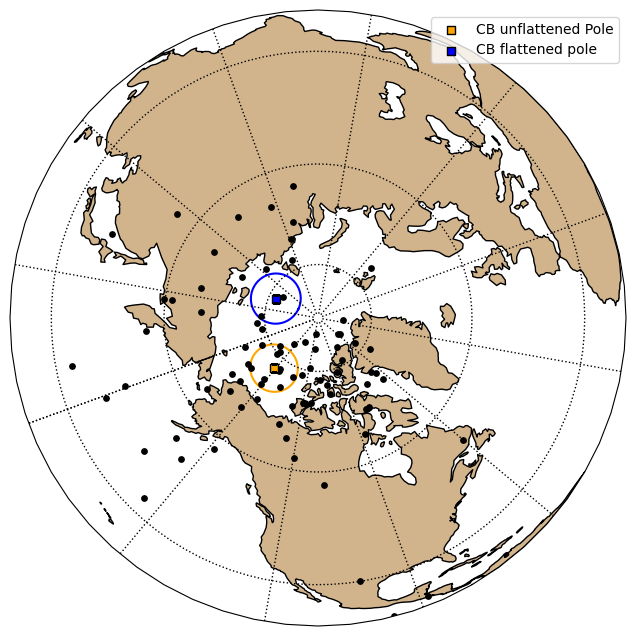

In [33]:
ht_axis=ipmag.make_orthographic_map(250,90)

ipmag.plot_vgp(ht_axis,cb_unflat['vgp_lon'],cb_unflat['vgp_lat'],markersize=15)
ipmag.plot_pole(ht_axis,cb_pole['dec'],cb_pole['inc'],cb_pole['alpha95'],marker='s',markersize=30,color='orange', label='CB unflattened Pole')
ipmag.plot_pole(ht_axis,135.3,81.3,4.7,marker='s',markersize=30,color='blue', label='CB flattened pole')


plt.legend()

plt.savefig('/Users/anthonyfuentes/Desktop/corral_bluffs/vgp_poles.png',dpi=300,bbox_inches='tight')



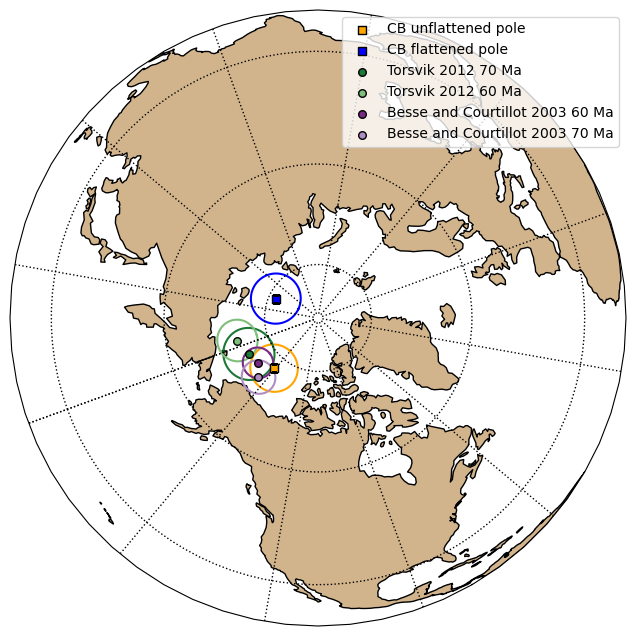

In [34]:
ht_axis=ipmag.make_orthographic_map(250,90)
ipmag.plot_pole(ht_axis,cb_pole['dec'],cb_pole['inc'],cb_pole['alpha95'],marker='s',markersize=30,color='orange', label= 'CB unflattened pole')
ipmag.plot_pole(ht_axis,135.3,81.3,4.7,marker='s',markersize=30,color='blue', label='CB flattened pole')
ipmag.plot_pole(ht_axis,187.5,75.3,4.9,marker='o',markersize=30,color='#1b7837', label='Torsvik 2012 70 Ma')
ipmag.plot_pole(ht_axis,175.6,74.2,3.9,marker='o',markersize=30,color='#7fbf7b',label='Torsvik 2012 60 Ma')

ipmag.plot_pole(ht_axis,196.8,75.9,2.9,marker='o',markersize=30,color='#762a83', label='Besse and Courtillot 2003 60 Ma')
ipmag.plot_pole(ht_axis,204.8,74.2,3.2,marker='o',markersize=30,color='#af8dc3', label='Besse and Courtillot 2003 70 Ma')

plt.legend()

plt.savefig('/Users/anthonyfuentes/Desktop/corral_bluffs/poles_apwp.png',dpi=300,bbox_inches='tight')


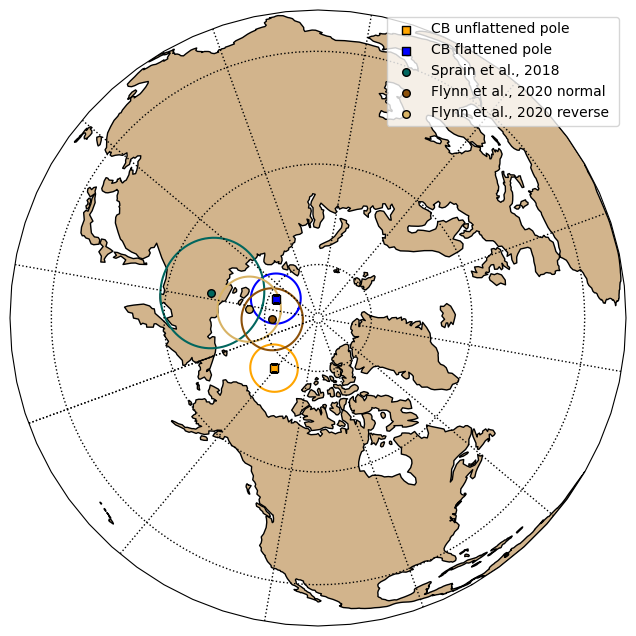

In [35]:
ht_axis=ipmag.make_orthographic_map(250,90)
ipmag.plot_pole(ht_axis,cb_pole['dec'],cb_pole['inc'],cb_pole['alpha95'],marker='s',markersize=30,color='orange', label= 'CB unflattened pole')
ipmag.plot_pole(ht_axis,135.3,81.3,4.7,marker='s',markersize=30,color='blue', label='CB flattened pole')

ipmag.plot_pole(ht_axis,146.7,69,10.4,marker='o',markersize=30,color='#01665e', label='Sprain et al., 2018')

ipmag.plot_pole(ht_axis,161.6,81.4,5.8,marker='o',markersize=30,color='#8c510a', label='Flynn et al., 2020 normal')
ipmag.plot_pole(ht_axis,152.7,76.9,6.1,marker='o',markersize=30,color='#d8b365', label='Flynn et al., 2020 reverse ')


plt.legend()

plt.savefig('/Users/anthonyfuentes/Desktop/corral_bluffs/otherpoles.png',dpi=300,bbox_inches='tight')


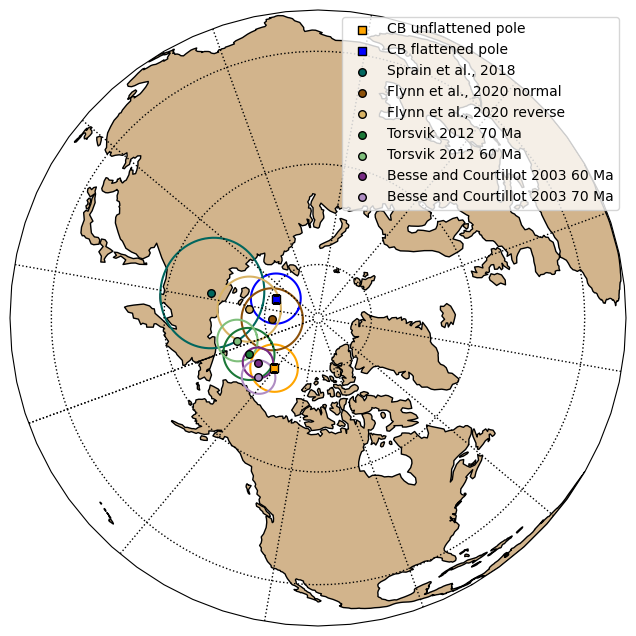

In [36]:

ht_axis=ipmag.make_orthographic_map(250,90)
ipmag.plot_pole(ht_axis,cb_pole['dec'],cb_pole['inc'],cb_pole['alpha95'],marker='s',markersize=30,color='orange', label= 'CB unflattened pole')
ipmag.plot_pole(ht_axis,135.3,81.3,4.7,marker='s',markersize=30,color='blue', label='CB flattened pole')

ipmag.plot_pole(ht_axis,146.7,69,10.4,marker='o',markersize=30,color='#01665e', label='Sprain et al., 2018')

ipmag.plot_pole(ht_axis,161.6,81.4,5.8,marker='o',markersize=30,color='#8c510a', label='Flynn et al., 2020 normal')
ipmag.plot_pole(ht_axis,152.7,76.9,6.1,marker='o',markersize=30,color='#d8b365', label='Flynn et al., 2020 reverse ')

ipmag.plot_pole(ht_axis,187.5,75.3,4.9,marker='o',markersize=30,color='#1b7837', label='Torsvik 2012 70 Ma')
ipmag.plot_pole(ht_axis,175.6,74.2,3.9,marker='o',markersize=30,color='#7fbf7b',label='Torsvik 2012 60 Ma')

ipmag.plot_pole(ht_axis,196.8,75.9,2.9,marker='o',markersize=30,color='#762a83', label='Besse and Courtillot 2003 60 Ma')
ipmag.plot_pole(ht_axis,204.8,74.2,3.2,marker='o',markersize=30,color='#af8dc3', label='Besse and Courtillot 2003 70 Ma')

plt.legend()


plt.savefig('/Users/anthonyfuentes/Desktop/corral_bluffs/allpoles.png',dpi=300,bbox_inches='tight')
